In [1]:
import pandas as pd
import numpy as np
root = '../dataset/hi'
root_soh = '../dataset/soh_charge'


In [2]:

def load_and_process(root, root_soh, dataset):
    hiv = pd.read_csv(f'{root}/hiv-charge-CS2_{dataset}.csv')
    soh = pd.read_csv(f'{root_soh}/soh-CS2_{dataset}.csv')

    # Mantieni solo le colonne da hiv e soh
    df = pd.merge(hiv, soh, how="right", on="cycle")[["cycle", "hi_v", "SOH"]]
    df = df.drop(columns=["cycle"])
    df_hiv = df[["hi_v"]]
    df_soh = df[["SOH"]]
    return df_hiv.values, df_soh.values

# Carica e processa i dataset
df_35_hiv, df_35_soh = load_and_process(root, root_soh, 35)
df_36_hiv, df_36_soh = load_and_process(root, root_soh, 36)
df_38_hiv, df_38_soh = load_and_process(root, root_soh, 38)

# Stampa i dataset
print(df_35_hiv)
print(df_35_soh)
print(df_36_hiv)
print(df_36_soh)
print(df_38_hiv)
print(df_38_soh)



[[25.48613644]
 [23.86111112]
 [23.86550059]
 [23.0320516 ]
 [22.77854532]
 [22.65953705]
 [22.67176198]
 [22.67198038]
 [22.55509837]
 [22.43513545]
 [22.43501305]
 [22.42138322]
 [22.42293513]
 [22.41776707]
 [22.30028386]
 [22.29706396]
 [22.29484353]
 [22.29224041]
 [22.29273925]
 [22.29277384]
 [22.16681309]
 [22.16717363]
 [22.16660763]
 [22.16501832]
 [22.05194658]
 [22.16731954]
 [22.1684725 ]
 [22.06908288]
 [22.06876573]
 [21.95013346]
 [22.08168786]
 [21.93787635]
 [21.93859125]
 [21.95841606]
 [21.83425014]
 [21.83895452]
 [21.84089066]
 [21.82373301]
 [21.82511362]
 [21.83864012]
 [21.72263512]
 [21.72272341]
 [21.72387523]
 [21.72236524]
 [21.71084205]
 [21.70714129]
 [21.60368212]
 [21.60433139]
 [21.72152129]
 [22.90295956]
 [22.06582577]
 [22.06139193]
 [21.94287415]
 [21.95577267]
 [21.9538657 ]
 [21.71501912]
 [21.96044087]
 [21.84549437]
 [21.84203351]
 [21.73035347]
 [21.73067007]
 [21.73470225]
 [21.6125622 ]
 [21.61615447]
 [21.61198032]
 [21.61217071]
 [21.50088

In [3]:
seq_length = 10

def split_sequence(data, seq_length, train=False):
    X, y = [],[]
    
    for j in data:
        # for i in range(len(j) - seq_length - 1):
        #     if train is True:
        #         X.append(j[i:i+seq_length])
        #     else:
        #         y.append(j[i + 1:i+seq_length + 1])
        for i in range(len(j) - seq_length):
            X.append(j[i:i+seq_length])
            y.append(j[i+seq_length])
#  for i in range(len(sequence)):
#     # find the end of this pattern
#     end_ix = i + n_steps
#     # check if we are beyond the sequence
#     if end_ix > len(sequence)-1:
#         break
#     # gather input and output parts of the pattern
#     seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        # X.append(seq_x)
        # y.append(seq_y)
    # X_1,y_1 = np.array(X), np.array(y)  
    # X_1,y_1 = np.random.shuffle(X_1), np.random.shuffle(y_1)
    if train:
        return np.array(X)
    else:
        return np.array(y)




In [22]:

# Assuming df_36_hiv, df_38_hiv, df_36_soh, df_38_soh, df_35_soh are defined

# Create sequences for training set
X_train = split_sequence([df_36_hiv, df_38_hiv], seq_length, train=True)
y_train = split_sequence([df_36_soh, df_38_soh], seq_length)

# print(X_train)

# Calculate mean and std for normalization
mean = X_train.mean()
std = X_train.std()
mean1 = y_train.mean()
std1 = y_train.std()

# Standardize the data
X_train = (X_train - mean) / std
y_train = (y_train - mean1) / std1

# # Shuffle the sequences
np.random.shuffle(X_train), np.random.shuffle(y_train)

# # Create sequences for testing set
X_test = split_sequence([df_35_hiv], seq_length, train = True)
y_test = split_sequence([df_35_soh], seq_length)

# # Normalize the test data using the mean and std from training data
X_test = (X_test - mean) / std
y_test = (y_test - mean1) / std1

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1711, 10, 1) (1711, 1) (787, 10, 1) (787, 1)


In [23]:
X_train

array([[[-0.23019049],
        [-0.24188653],
        [-0.20160826],
        ...,
        [-0.18950596],
        [-0.14599697],
        [-0.1367474 ]],

       [[ 0.50034298],
        [ 0.5187058 ],
        [ 0.53827934],
        ...,
        [ 0.47927086],
        [ 0.51918672],
        [ 0.53854512]],

       [[ 0.43654283],
        [ 0.43295087],
        [ 0.43173843],
        ...,
        [ 0.42871379],
        [ 0.41286667],
        [ 0.43001011]],

       ...,

       [[ 0.67904477],
        [ 0.6780342 ],
        [ 0.67687758],
        ...,
        [ 0.70246272],
        [ 0.67878202],
        [ 0.82606748]],

       [[-1.31749082],
        [-1.33898692],
        [-1.29597916],
        ...,
        [-1.38086955],
        [-1.38011585],
        [-1.40173   ]],

       [[ 0.38519552],
        [ 0.37160169],
        [ 0.32864179],
        ...,
        [ 0.23129217],
        [ 0.21467095],
        [ 0.19878626]]])

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras import optimizers


n_steps = 10
n_features = 1

#X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
print(X_train.shape, n_steps)

adam = optimizers.Adam(lr=0.00005, beta_1=0.9, beta_2=0.999)
# define model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(n_steps, n_features), return_sequences= False))
model.add(Dense(1))
model.compile(optimizer=adam, loss='mse')

(1711, 10, 1) 10


c:\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [25]:
# fit model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=1)


Epoch 1/50


14/14 [==============================] - 3s 33ms/step - loss: 1.0025
Epoch 2/50
14/14 [==============================] - 0s 25ms/step - loss: 1.0015
Epoch 3/50
14/14 [==============================] - 0s 25ms/step - loss: 1.0011
Epoch 4/50
14/14 [==============================] - 0s 23ms/step - loss: 1.0005
Epoch 5/50
14/14 [==============================] - 0s 24ms/step - loss: 1.0003
Epoch 6/50
14/14 [==============================] - 0s 32ms/step - loss: 1.0001
Epoch 7/50
14/14 [==============================] - 0s 35ms/step - loss: 1.0000
Epoch 8/50
14/14 [==============================] - 0s 28ms/step - loss: 0.9999
Epoch 9/50
14/14 [==============================] - 0s 25ms/step - loss: 0.9998
Epoch 10/50
14/14 [==============================] - 0s 23ms/step - loss: 0.9998
Epoch 11/50
14/14 [==============================] - 0s 22ms/step - loss: 0.9997
Epoch 12/50
14/14 [==============================] - 0s 21ms/step - loss: 0.9997
Epoch 13/50
14/14 [=============================

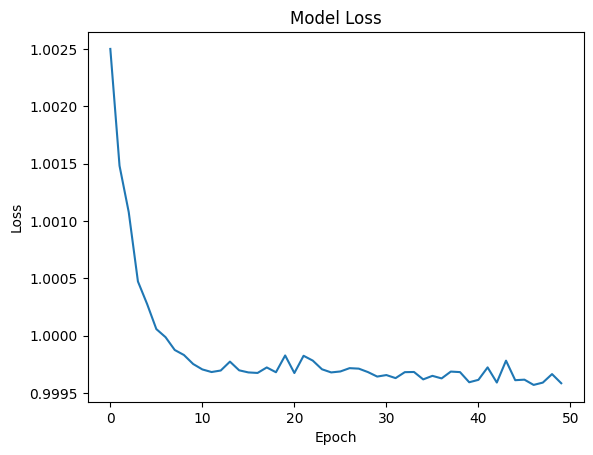

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [27]:
import math

trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 1.00 MSE (1.00 RMSE)
Test Score: 0.70 MSE (0.84 RMSE)


21/25 [========================>.....] - ETA: 0s

25/25 [==============================] - 0s 5ms/step


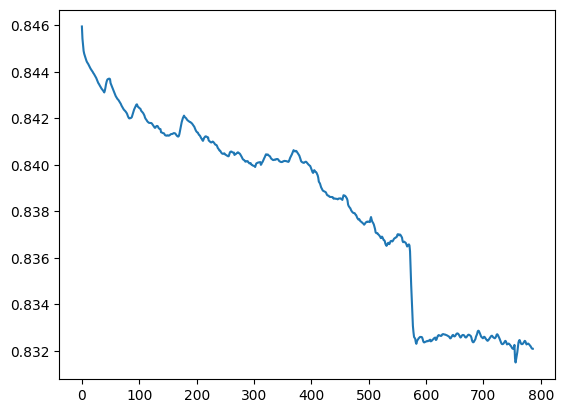

In [28]:
y_pred1 = model.predict(X_test)
y_pred1 = y_pred1 * std1 + mean1 
plt.plot(y_pred1)

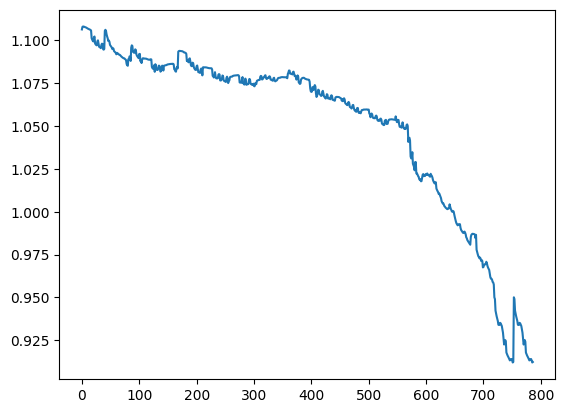

In [30]:

y_test1 = y_test * std1 + mean1
plt.plot(y_test1)

25/25 [==============================] - 0s 7ms/step
(787, 1)


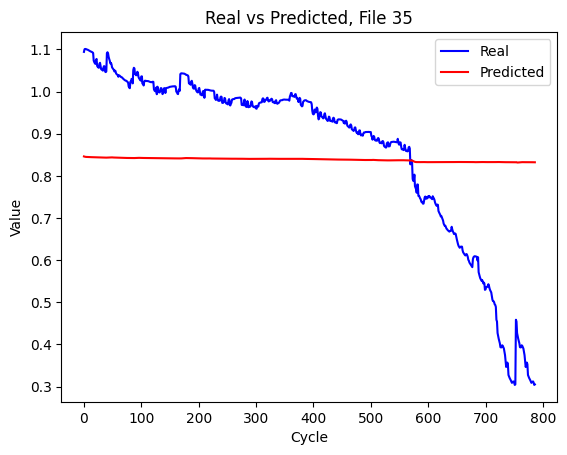

In [29]:
# Predici i valori sul dataset di test
y_pred = model.predict(X_test)
print(y_pred.shape)
y_pred = y_pred * std1 + mean1
y_test = y_test * std1 + mean1
# Reshape y_test to match the shape of y_pred
# y_test_reshaped = y_test.reshape(y_pred.shape)
# y_test_reshaped = y_test_reshaped * std1 - mean1
# Plotta i valori reali e i valori predetti destandardizzati per il file 35
plt.plot(y_test, label='Real', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Real vs Predicted, File 35')
plt.xlabel('Cycle')
plt.ylabel('Value')
plt.legend()
plt.show()